# PA2 Random forests
#### Applied Machine Learning
Group 39: Sebastian Kölbel & Min Ze Teh

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1
We begin by importing the testing and training csv files using pandas and dividing the sets into input and output.

In [22]:
training = pd.read_csv('Data/adult_train.csv')
X_train = training.drop('target', axis=1)
Y_train = training['target']

testing = pd.read_csv('Data/adult_test.csv')
X_test = testing.drop('target', axis=1)
Y_test = testing['target']

To use the classifiers in sklearn we first have to make our input values into numerical values.
The way used here is one-hot encoding, which we performed by first making our input into dictionaries and then running the dictionaries into the imported function DictVectorizer(). We picked gradient boosting classfier as it was one of the top performing classifiers in the previous assignment. However, as the data is different this time around, this might no longer be the case.

In [23]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Create dictionaries of our train and testing input data.
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

# Creating matrix from dictionaries
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

# Picking gradient boosting classifier and performing cross validation
gbc_clf = gbc(max_depth=5,random_state=1)
print('Gradient boosting classifier cross_val_score:', cross_val_score(gbc_clf, X_train_encoded, Y_train).mean())

# Testing accuracy of the classifier
gbc_clf.fit(X_train_encoded, Y_train)
Y_guess = gbc_clf.predict(X_test_encoded)

print('Gradient boosting classifier accuracy: ',accuracy_score(Y_test, Y_guess))


Gradient boosting classifier cross_val_score: 0.871564280246915
Gradient boosting classifier accuracy:  0.8740863583317978


We then created a pipeline using the same steps as in the previous cell, but sequentially using make_pipeline(). 

In [24]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    DictVectorizer(),
    gbc(max_depth=5, random_state=1)
)

And a quick test to see that the pipeline works.

In [25]:
pipeline.fit(dicts_for_my_training_data, Y_train)
Y_guess2 = pipeline.predict(dicts_for_my_test_data)
print('accuracy test: ',accuracy_score(Y_test, Y_guess2))

accuracy test:  0.8740863583317978


## Task 2
We begin by computing the accuracy scores for different max depths in the decision tree classifier.

In [26]:
from sklearn.tree import DecisionTreeClassifier
acc_train = []
acc_test = []

for i in range(1,13):
    dtc_clf = DecisionTreeClassifier(max_depth=i)
    dtc_clf.fit(X_train_encoded, Y_train)

    # Train set
    acc_train.append(accuracy_score(Y_train, dtc_clf.predict(X_train_encoded)))

    # Test set
    acc_test.append(accuracy_score(Y_test, dtc_clf.predict(X_test_encoded)))

These scores are plotted the same way as in the previous assignment. We notice that the more noticable divergance starts at a tree depth of 8, but before that the accuracy is pretty similar. For the tree regressor in the last assignment, the difference between the test and training sets increased linearly to about 8 in tree depth, and after that had a more exponential increase difference. So it would seem that the overfitting is more apparent with increased tree depth. This is likely due to exaggerated emphasis on certain characteristics.

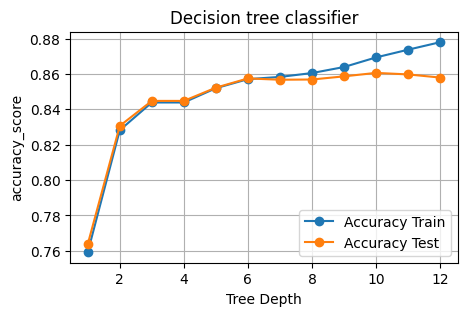

In [27]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(range(1,13), acc_train, label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test, label='Accuracy Test', marker='o')

plt.title('Decision tree classifier')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)
plt.show()

We then move on from Decision tree classifier to Random forest classifer. We perform the same process but include another varying parameter n_estimators which signifies the number of decision trees used in the ensamble.

In [28]:
from sklearn.ensemble import RandomForestClassifier
acc_train2 = []
acc_test2 = []

for j in [1,100,200,300]:
    for i in range(1,13):
        rfc_clf = RandomForestClassifier(n_estimators=j,n_jobs=-1,max_depth=i)
        rfc_clf.fit(X_train_encoded, Y_train)
        # Train set
        acc_train2.append(accuracy_score(Y_train, rfc_clf.predict(X_train_encoded)))
        # Test set
        acc_test2.append(accuracy_score(Y_test, rfc_clf.predict(X_test_encoded)))

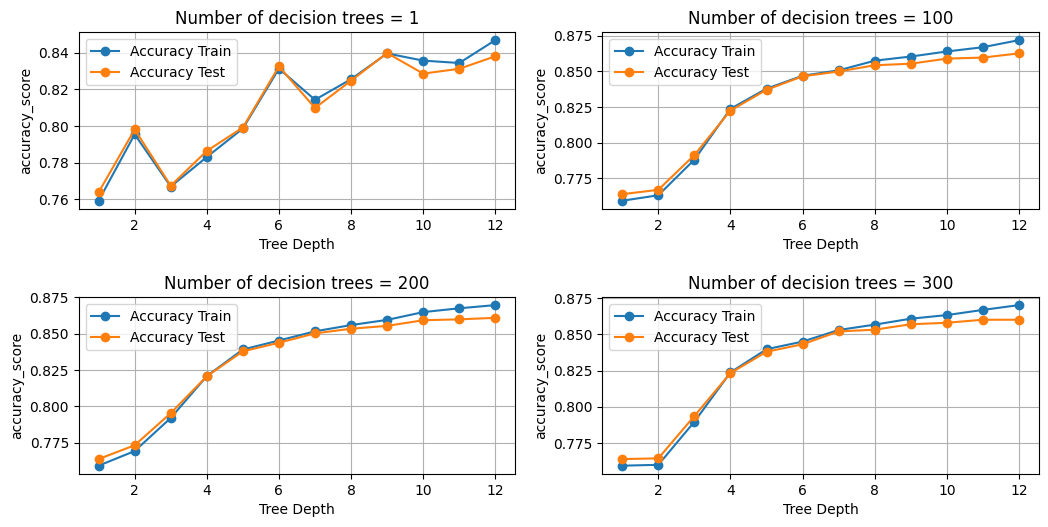

In [29]:
# Plotting
plt.figure()
plt.subplot(221)
plt.plot(range(1,13), acc_train2[0:12], label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test2[0:12], label='Accuracy Test', marker='o')
plt.title('Number of decision trees = 1')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.plot(range(1,13), acc_train2[12:24], label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test2[12:24], label='Accuracy Test', marker='o')
plt.title('Number of decision trees = 100')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.plot(range(1,13), acc_train2[24:36], label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test2[24:36], label='Accuracy Test', marker='o')
plt.title('Number of decision trees = 200')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.plot(range(1,13), acc_train2[36:48], label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test2[36:48], label='Accuracy Test', marker='o')
plt.title('Number of decision trees = 300')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.08, left=1, right=2.5, hspace=0.5,
                    wspace=0.2)
plt.show()

To start of we can see that for the ensamble size of 1, we see that the curve for a decision tree classifier is smoother than the curve for a random forest. This is because a random forest with an ensemble size of 1 lacks the averaging effect of multiple trees, which helps in reducing overfitting. We also observe that as the ensemble size increases, the accuracy score curve becomes smoother and sort of plateaus. This is because the accuracy score is averaged over a number of trees corresponding to the ensemble size which implies that each tree has less influence, making the score more stable.

As the ensemble size grows, the observed test set accuracy remains relatively similar after tree depth 10. Increasing it further is likely to either have a very small benefit for a potentially large cost of increased training time, or in the worst case even decrease accuracy. 

## Task 3

The importance score indicates the contribution of each feature to the predictive performance of the model. In a random forest classifier, feature importance is calculated based on how much each feature decreases impurity across all decision trees in the forest. The impurity decrease is a measure of how much a feature improves the purity of the nodes it is used to split. The importance score is computed by averaging the impurity decrease caused by each feature over all decision trees in the ensemble. Features with higher importance scores are considered more influential in making predictions.

To measure the importance we simply use the feature_importances_ attribute of the Random Forest Classifier, but there are other methods, such as the sklearn.inspecitons permutation_importance, which uses permutation importance instead, measuring how much the score decreases when removing a feature.

In [30]:
pipeline = make_pipeline(DictVectorizer(), RandomForestClassifier(n_estimators = 200,max_depth =15,  n_jobs = -1))
pipeline.fit(dicts_for_my_training_data, Y_train)
feature_names = pipeline.steps[0][1].feature_names_
f_importances = pipeline.steps[1][1].feature_importances_
importance_df = pd.DataFrame(list(zip(feature_names, f_importances)), columns = [1, 2]).explode(2).reset_index(drop = True).add_prefix("column")
importance_df.rename(columns = {"column1": "Feature Name", "column2": "Feature Importance"}, inplace = True)
importance_df = importance_df.sort_values(by="Feature Importance", ascending = False).reset_index(drop=True)
importance_df.head(10)

,Feature Name,Feature Importance
0,capital-gain,0.156188
1,marital-status=Married-civ-spouse,0.110405
2,education-num,0.089444
3,relationship=Husband,0.082854
4,age,0.081982
5,hours-per-week,0.056713
6,marital-status=Never-married,0.044990
7,capital-loss,0.043897
8,occupation=Exec-managerial,0.027529
9,occupation=Prof-specialty,0.023517


Let's explore the top few features that are of importance. 

Capital Gain: Represents the amount of monetary gain individuals have realized from the sale of capital assets over a certain period.

Education Number: Represents the number of years of education completed by the individual.

Marital Status: Represents the marital status of the individual

Relationship-Husband: Represents men who are married

Age: Represents the age of the individual


Individuals who have higher capital gains are likely to have more disposable income. Number of education years reflect an individual's education level and thus the type of job and income. Higher education is usually associated with higher pay. In general, marital status should not affect the income of an individual. As for relationship-husband, this could be due to the income disparity between men and women. Age could reflect an individual's experience, with more experience getting higher pay.

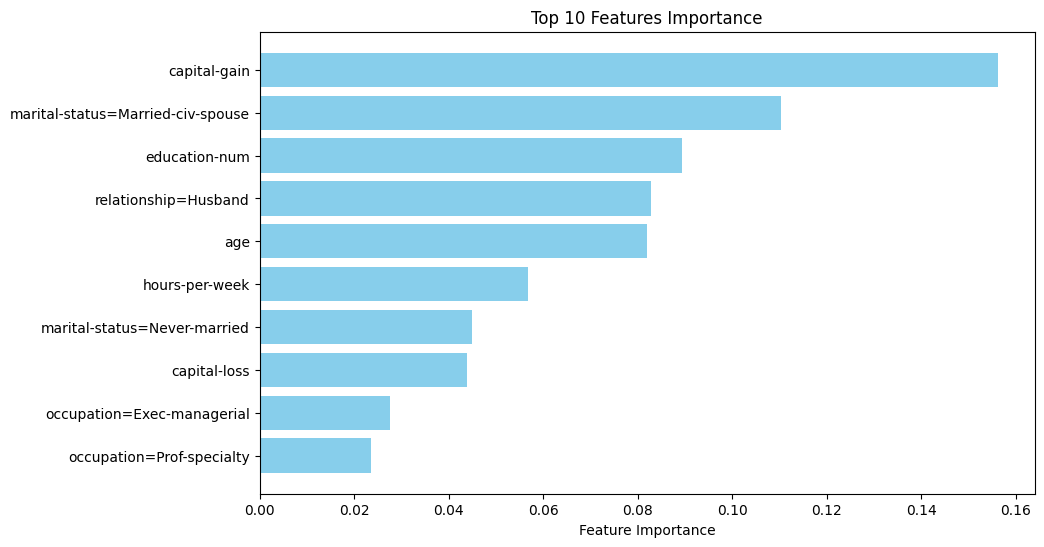

In [31]:
# Plotting the top 5 features and their importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature Name"][:10], importance_df["Feature Importance"][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()
plt.show()